In [44]:
!pip install -Uqq fastbook
!pip install graphviz
# !pip install fastai --upgrade

Requirement already up-to-date: fastai in /home/th-wsl/.local/lib/python3.8/site-packages (2.5.3)


In [45]:
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [46]:
from fastbook import *
from fastai.vision.widgets import *

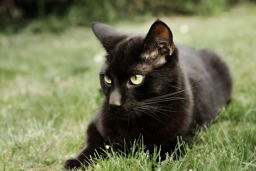

In [47]:
# skipping using azure bing api to get images in favor of duckduckgo
urls = search_images_ddg('black cats', max_images=100)
len(urls),urls[0]

download_url(urls[0], 'images/black_cat.jpg')
im = Image.open('images/black_cat.jpg')
im.thumbnail((256,256))
im

In [57]:
feline_types = 'black cat','lion','tiger','panther'
path = Path('felines')

tuple

In [58]:
import shutil

file_path = 'felines/'

try: 
    shutil.rmtree(file_path)
except OSError as e:
    print("Error: %s : %s" % (file_path, e.strerror))

In [59]:
try:
    count = 0
    if not path.exists():
        path.mkdir()
        for o in feline_types:
            count += 1
            print(count)
            dest = (path/o)
            dest.mkdir(exist_ok=True)
            results = search_images_ddg(f'{o}', max_images=150)
            # print(results)
            download_images(dest, urls=results)
except Exception as e:
    print(e)
                  

1
2
3
4


In [60]:
fns = get_image_files(path)
fns

(#666) [Path('felines/tiger/00000013.jpg'),Path('felines/tiger/00000087.jpg'),Path('felines/tiger/00000195.jpg'),Path('felines/tiger/00000057.png'),Path('felines/tiger/00000011.jpg'),Path('felines/tiger/00000135.jpg'),Path('felines/tiger/00000054.jpg'),Path('felines/tiger/00000165.jpg'),Path('felines/tiger/00000128.jpg'),Path('felines/tiger/00000024.jpg')...]

In [61]:
failed = verify_images(fns)
failed

(#42) [Path('felines/tiger/00000115.jpg'),Path('felines/tiger/00000143.jpg'),Path('felines/tiger/00000139.jpg'),Path('felines/lion/00000087.jpg'),Path('felines/lion/00000135.jpg'),Path('felines/lion/00000144.jpg'),Path('felines/lion/00000058.jpg'),Path('felines/lion/00000119.jpg'),Path('felines/lion/00000049.jpg'),Path('felines/lion/00000063.jpg')...]

In [62]:
failed.map(Path.unlink)

(#42) [None,None,None,None,None,None,None,None,None,None...]

In [111]:
felines = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128)
    # item_tfms=RandomResizedCrop(128, min_scale=0.3)    
)

In [112]:
dls = felines.dataloaders(path)

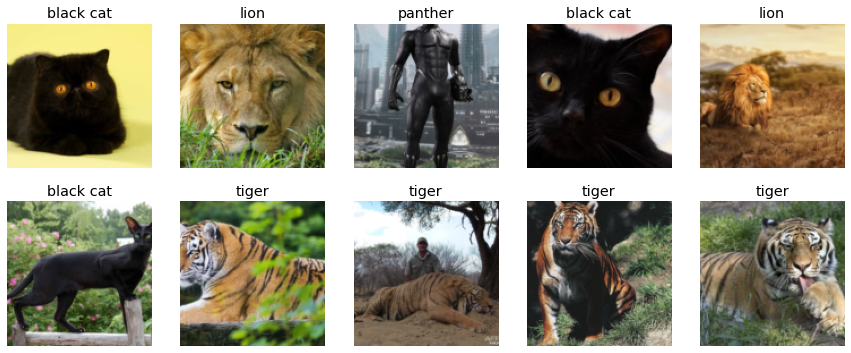

In [113]:
dls.valid.show_batch(max_n=10, nrows=2)

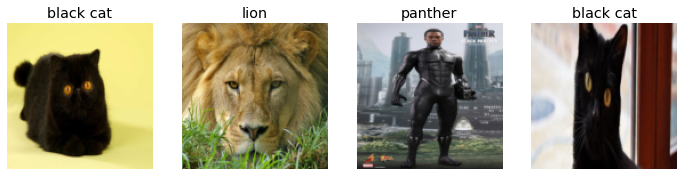

In [114]:
felines = felines.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = felines.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

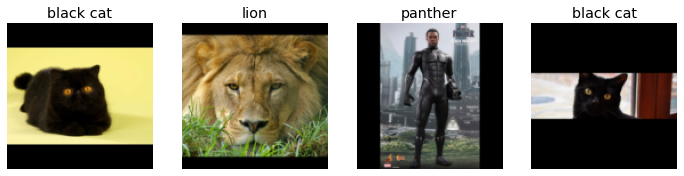

In [115]:
felines = felines.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = felines.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [116]:
doc(DataBlock)

,Type,Default
blocks,NoneType,``
dl_type,NoneType,``
getters,NoneType,``
n_inp,NoneType,``
item_tfms,NoneType,``
batch_tfms,NoneType,``
get_items,NoneType,``
splitter,NoneType,``
get_y,NoneType,``
get_x,NoneType,``


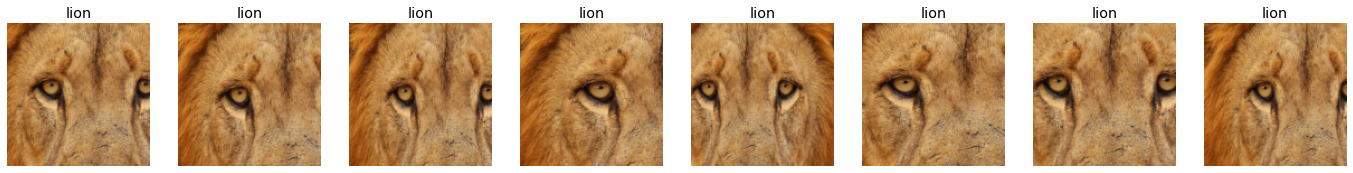

In [121]:
felines = felines.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = felines.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

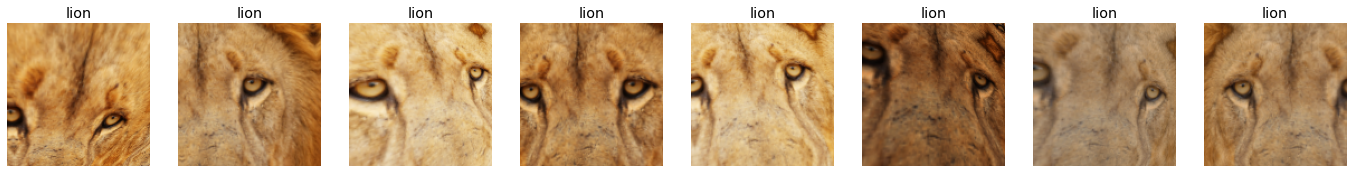

In [122]:
felines = felines.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = felines.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [126]:
felines = felines.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls=felines.dataloaders(path)

In [127]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/th-wsl/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.772418,0.284204,0.104839,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.342087,0.151304,0.056452,01:16
1,0.245146,0.179706,0.056452,01:08
2,0.182861,0.188836,0.048387,01:08
3,0.145373,0.188801,0.048387,01:13


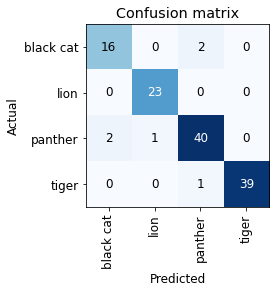

In [128]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

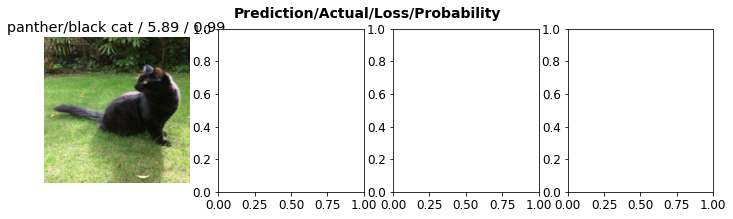

In [133]:
interp.plot_top_losses(4, nrows=1)

In [136]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [144]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Error: Destination path 'felines/lion/00000168.jpg' already exists

In [145]:
learn.export()

In [146]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [147]:
learn_inf = load_learner(path/'export.pkl')

In [148]:
learn_inf.predict('images/black_cat.jpg')

('black cat',
 TensorBase(0),
 TensorBase([9.9469e-01, 1.9043e-05, 5.2894e-03, 3.6533e-06]))

In [149]:
learn_inf.dls.vocab

['black cat', 'lion', 'panther', 'tiger']

In [150]:
btn_upload = widgets.FileUpload()

In [151]:
btn_upload

FileUpload(value={}, description='Upload')

In [153]:
btn_upload = SimpleNamespace(data = ['images/black_cat.jpg'])

In [154]:
img = PILImage.create(btn_upload.data[-1])

In [155]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [156]:
pred,pred_idx,probs = learn_inf.predict(img)

In [157]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black cat; Probability: 0.9947')

In [158]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [159]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [160]:
btn_upload = widgets.FileUpload()

In [161]:
VBox([widgets.Label('Select your feline!'), btn_upload, btn_run, out_pl, lbl_pred])

In [165]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
Traceback (most recent call last):
  File "/home/th-wsl/.local/bin/jupyter-serverextension", line 8, in <module>
    sys.exit(main())
  File "/home/th-wsl/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/th-wsl/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/th-wsl/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 291, in start
    super().start()
  File "/home/th-wsl/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 253, in start
    self.subapp.start()
  File "/home/th-wsl/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 210, in start
    self.toggle_server_extension(arg)
  File "/home/th-wsl/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 181